In [261]:
import pandas as pd 
import numpy as np 

df  = pd.read_csv("../datamining_team_project_data/nowon_PetStatus.csv", encoding='cp949')
df2 = pd.read_csv("../datamining_team_project_data/dongdaemun_PetStatus20.csv", encoding='cp949')
df3 = pd.read_csv("../datamining_team_project_data/dongdaemun_petName.csv", encoding='cp949')
df_dobong = pd.read_csv("../datamining_team_project_data/dobong_petStatus.csv", encoding='cp949')
df_loan = pd.read_csv("../datamining_team_project_data/임대동향 지역별 임대료(2024년3분기~)_소규모 상가.csv", encoding='cp949')
df_seoulZone = pd.read_csv("../datamining_team_project_data/seoul_businessZone.csv", encoding='cp949')

df.describe()

,년도,등록주체(시군구),등록주체(대행업체),등록주체(기타(이벤트등)),RFID종류(내장형),RFID종류(외장형),RFID종류(인식표),등록 품종수,동물소유자수,동물소유자당동물등록수,합계,미승인,반려
count,65.000000,65.000000,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000
mean,2018.000000,12.138462,458.476923,0.0,202.123077,235.430769,33.061538,33.092308,412.538462,1.118615,470.615385,0.0,0.446154
std,3.770776,36.676745,592.446282,0.0,231.523926,360.869825,70.877508,14.136304,524.601875,0.064514,612.986712,0.0,1.275132
min,2012.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
25%,2015.000000,1.000000,130.000000,0.0,65.000000,52.000000,0.000000,25.000000,121.000000,1.080000,131.000000,0.0,0.000000
50%,2018.000000,2.000000,241.000000,0.0,111.000000,109.000000,8.000000,33.000000,225.000000,1.110000,251.000000,0.0,0.000000
75%,2021.000000,7.000000,561.000000,0.0,275.000000,245.000000,20.000000,43.000000,468.000000,1.150000,567.000000,0.0,0.000000
max,2024.000000,261.000000,3277.000000,0.0,1173.000000,2246.000000,466.000000,65.000000,2784.000000,1.400000,3290.000000,0.0,8.000000


In [196]:
df2

# 면적을 구해서 

,읍면동(법정동),등록주체_시군구,등록주체_대행업체,등록주체_기타(이벤트 등),등록형태_내장형RFID,등록형태_외장형RFID,등록형태_인식표RFID,등록품종수,동물소유자수,동물소유자당동물등록수,총등록수,데이터기준일자
0,신설동,6.0,188.0,0.0,70.0,103.0,21.0,32.0,147.0,1.32,194.0,2020-10-14
1,용두동,70.0,1275.0,2.0,508.0,721.0,118.0,64.0,1025.0,1.31,1347.0,2020-10-14
2,이문동,52.0,2320.0,1.0,1034.0,1196.0,143.0,67.0,1344.0,1.77,2373.0,2020-10-14
3,장안동,133.0,3450.0,1.0,1508.0,1871.0,205.0,78.0,2745.0,1.31,3584.0,2020-10-14
4,전농동,76.0,1882.0,2.0,1030.0,800.0,130.0,67.0,1559.0,1.26,1960.0,2020-10-14
5,제기동,42.0,1152.0,0.0,436.0,680.0,78.0,63.0,901.0,1.33,1194.0,2020-10-14
6,회기동,10.0,325.0,0.0,162.0,143.0,30.0,40.0,285.0,1.18,335.0,2020-10-14
7,휘경동,38.0,1374.0,1.0,658.0,676.0,79.0,60.0,1130.0,1.25,1413.0,2020-10-14
8,답십리동,108.0,2428.0,2.0,1319.0,1025.0,194.0,69.0,1873.0,1.36,2538.0,2020-10-14
9,청량리동,30.0,843.0,0.0,289.0,530.0,54.0,54.0,659.0,1.32,873.0,2020-10-14


AttributeError: Text.set() got an unexpected keyword argument 'encoding'

/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from current font.
  func(*args, **kwargs)
/Users/krok/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph

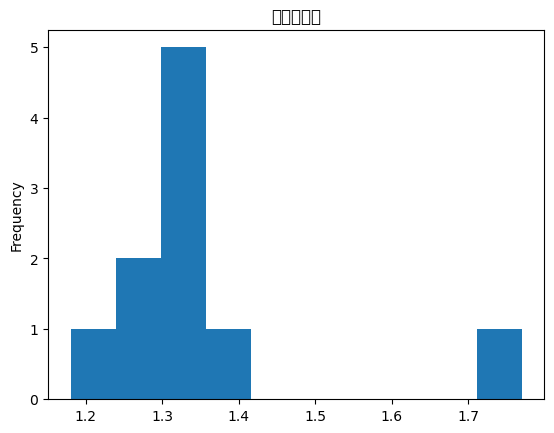

In [198]:
import pandas as pd
import matplotlib.pyplot as plt


# 'value' 열 추출
values_series = df2['동물소유자당동물등록수']

# 히스토그램 그리기 (방법 1: Series.plot.hist())
values_series.plot.hist()
plt.title('히스토그램', encoding='cp949')
plt.xlabel('값',encoding='cp949')
plt.ylabel('빈도', encoding='cp949')
plt.show()

# 히스토그램 그리기 (방법 2: plt.hist())
# plt.hist(values_series, bins=5)  # bins는 구간 수, 기본값은 10
plt.title('히스토그램')
plt.xlabel('값')
plt.ylabel('빈도')
plt.show()

In [ ]:
pip install chardet

In [201]:
import pandas as pd
import glob
import os
import chardet

def detect_encoding(file_path, num_bytes=10000):
    """파일 인코딩 자동 감지"""
    with open(file_path, 'rb') as f:
        raw_data = f.read(num_bytes)
    result = chardet.detect(raw_data)
    return result['encoding']

def read_csv_with_auto_encoding(file_path):
    """감지된 인코딩으로 CSV 읽기"""
    try:
        encoding = detect_encoding(file_path)
        return pd.read_csv(file_path, encoding=encoding)
    except Exception as e:
        print(f"[ERROR] {file_path} 인코딩 실패 → {e}")
        return None

def merge_pet_status_csvs(folder_path: str, output_file: str):
    """
    `_petStatus.csv`로 끝나는 모든 CSV 병합:
    - 인코딩 자동 감지
    - 누락된 열은 0으로 채움
    - source_file 열 추가
    - 결과는 output_file에 덮어쓰기 저장
    """
    all_files = glob.glob(os.path.join(folder_path, "*_petStatus.csv"))
    dataframes = []

    for file in all_files:
        df = read_csv_with_auto_encoding(file)
        if df is not None:
            df['source_file'] = os.path.basename(file)
            df = df.fillna(0)
            dataframes.append(df)

    if not dataframes:
        print("⚠️ 병합할 유효한 파일이 없습니다.")
        return

    def extract_region_column(df, keywords=None, new_column_name='지역명'):
        """
        주어진 DataFrame에서 특정 키워드가 포함된 열들만 추출하여
        하나의 열로 세로 병합한 DataFrame을 반환합니다.
    
        Parameters:
        - df (pd.DataFrame): 원본 데이터프레임
        - keywords (list): 포함 키워드 리스트 (기본값은 지역 관련 키워드)
        - new_column_name (str): 생성될 열의 이름 (기본값은 '지역명')
    
        Returns:
        - pd.DataFrame: 병합된 하나의 열을 가진 데이터프레임
        """
        if keywords is None:
            keywords = ['법정동', '행정동', '읍면동', '동별']
        
        columns_to_merge = [col for col in df.columns if any(keyword in col for keyword in keywords)]
        
        merged_series = pd.concat([df[col].dropna() for col in columns_to_merge], ignore_index=True)
        
        return pd.DataFrame({new_column_name: merged_series})

    merged_df = pd.concat(dataframes, ignore_index=True, sort=False).fillna(0)
    merged_df.to_csv(output_file, index=False)
    print(f"✅ 병합 완료: {output_file}")


In [203]:
import os

folder_path = "../data_mining"
filename = "merged_petStatus.csv"
full_path = os.path.join(folder_path, filename)

df_csv = pd.read_csv(full_path, encoding='utf-8')
df_csv = pd
df_csv

<module 'pandas' from '/Users/krok/anaconda3/lib/python3.11/site-packages/pandas/__init__.py'>

In [205]:
import pandas as pd
df_csv['법정동'] = df_csv['읍면동(법정동)'] +  df_csv['읍면동명'] + df_csv['법정동'] + df_csv['법정동명'] +df_csv['행정동'] 
df.drop(['읍면동명', '읍면동(법정동)', '법정동명', '행정동'], axis=1, inplace=True)

TypeError: 'module' object is not subscriptable

###
 * dong = 읍면동(법정동) , 법정동, 읍면동명, 행정동, 동별  (원래 가지고 있는 이름들 제거)
 * 시도명 지우기 
 * 정규분포로 만들고 오차범위 z = 1.96(95%)
 * 열 순서 변경 > source_file의 열 이름을 맨 뒤로 이동
 * drop : 시도별, 동물 품종 수 eliminate
 * 
 

In [207]:
df_csv.columns

AttributeError: module 'pandas' has no attribute 'columns'

In [211]:
df['dogcat_enroll'] = df['개등록수' ]+ df['고양이등록수']

KeyError: '개등록수'

In [190]:
import pandas as pd

def merge_dong_columns(csv_path, output_path):
    # CSV 파일 읽기
    df = pd.read_csv(csv_path, encoding='utf-8-sig')

    # === 기준 열 및 병합 대상 열 목록 정의 ===
    base_col = '읍면동(법정동)'
    fill_columns = ['법정동', '행정동', '읍면동', '동명', '법정동명', '동', '읍면동명']

    base2_col = '동물소유자수(명)'
    fill2_columns = ['등록수', '동물소유자수(전체)', '동물소유자수', '동물 소유자수', '등록주체(대행업체)', '누적등록수(마리)',
                     '등록동물수', '등록동물수(마리)']

    base3_col = '동물등록수합계(마리)'
    fill3_columns = ['동물 등록수', '등록수', '합계', '누적등록수', '대행업체', '등록소유자수']

    base4_col = '년도'
    fill3_columns = ['기준일', '연도', '데이터기준일자']
     

    # === 'dong' 열 채우기: '0'인 경우 다른 열에서 채우기 ===
    for col in fill_columns:
        if col in df.columns:
            df.loc[df[base_col] == '0', base_col] = df.loc[df[base_col] == '0', col]
    df.rename(columns={base_col: 'dong'}, inplace=True)

    # === '동물소유자수(명)' 열 채우기 ===
    for col in fill2_columns:
        if col in df.columns:
            df.loc[df[base2_col] == 0, base2_col] = df.loc[df[base2_col] == 0, col]
    df.rename(columns={base2_col: 'enrollpet_people'}, inplace=True)

    # === '동물등록수합계(마리)' 열 채우기 ===
    for col in fill3_columns:
        if col in df.columns:
            df.loc[df[base3_col] == 0, base3_col] = df.loc[df[base3_col] == 0, col]
    df.rename(columns={base3_col: 'enrollpet_count'}, inplace=True)

    # === 불필요한 열 삭제 ===
    drop_columns = (
        [col for col in fill_columns if col in df.columns] +
        [col for col in fill2_columns if col in df.columns] +
        [col for col in fill3_columns if col in df.columns] +
        [
            '시도명', '시군명',
            '내장형 무선식별(RFID)', '외장형 무선식별(RFID)', '인식표 무선식별(RFID)',
            'RFID종류(외장형)', 'RFID종류(인식표)', '등록주체(기타(이벤트등))',
            # 필요한 경우 아래 열도 추가
            '반려', '미승인', '내장형 칩(RFID)', '외장형 칩(RFID)', '시군구명', 'RFID종류(내장형)'
            ,'(등록주체)시군구등록', '(등록주체)대행업체등록', '(등록주체)기타', '등록품종수', '내장형_무선인식(RFID)종류',
            '외장형_무선인식(RFID)종', '인식표_무선인식(RFID)', '자치구명', 
        ]
    )
    df.drop(columns=[col for col in drop_columns if col in df.columns], inplace=True)

    # === 저장 ===
    df.to_csv(output_path, index=False, encoding='utf-8-sig')
    print(f"✅ 저장 완료: {output_path}")

    if '개등록수' in df.columns and '고양이등록수' in df.columns:
        df['dogcat_enroll'] = df['개등록수'] + df['고양이등록수']


    return df


In [192]:
if __name__ == "__main__":
    merge_dong_columns(
        csv_path="merged_petStatus.csv",
        output_path="cleaned_petStatus.csv"
    )

✅ 저장 완료: cleaned_petStatus.csv


In [279]:
df_2024Zone = pd.read_csv("../datamining_team_project_data/seoul_businessZone.csv", encoding='cp949')
df_petSeoulZone = df_2024Zone[df_2024Zone['서비스_업종_코드'] == 'CS300029']
df_areaSeoul = pd.read_csv("../datamining_team_project_data/행정구역(동별)_20250520004149.csv")
df_petSeoulZone
df_petSeoulZone.to_csv('../datamining_team_project_data/df_petSeoulZone.csv')
seoulInfomation = pd.concat([df_petSeoulZone, df_areaSeoul], axis=1)
seoulInfomation
# result = pd.concat([df1, df2[['gender']]], axis=1)
# 주중 매출 (2502-2501), 주중매출 (2503-2502), 

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,연령대_60_이상_매출_건수,동별(1),동별(2),동별(3),2023,2023.1,2023.2,2023.3,2023.4,2023.5
9,20243.0,D,발달상권,3120057.0,아차산역,CS300029,애완동물,5960147.0,7.0,5960147.0,...,0.0,서울시,종로구,교남동,0.35,0.06,1,6,18,96
74,20243.0,A,골목상권,3110407.0,도봉역 2번,CS300029,애완동물,36000000.0,18.0,36000000.0,...,13.0,서울시,광진구,군자동,0.74,0.12,1,1,28,226
225,20244.0,D,발달상권,3120236.0,장지역(가든파이브),CS300029,애완동물,33491705.0,1070.0,6978296.0,...,129.0,서울시,마포구,염리동,0.43,0.07,1,1,19,144
885,20243.0,D,발달상권,3120177.0,신논현역 1번,CS300029,애완동물,2248755.0,34.0,2248755.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,20243.0,D,발달상권,3120207.0,선정릉역,CS300029,애완동물,177968338.0,310.0,101239063.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,서울시,강동구,둔촌1동,0.92,0.15,1,1,23,229
450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,서울시,강동구,둔촌2동,1.56,0.26,1,-,29,262
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,서울시,강동구,강일동,2.26,0.37,1,1,40,317
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,서울시,강동구,상일1동,1.82,0.30,1,1,46,397


In [ ]:
pd.concat([df_petSeoulZone, df], ignore_index=True)